#**EDA ASSIGNMENT**


1. Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

In [19]:
import pandas as pd
import os


print("Files in current directory:", os.listdir())


df = pd.read_csv("/content/BIKE DETAILS.csv")

print(df.head(10))
print("Shape:", df.shape)
print("Columns:", df.columns)

Files in current directory: ['.config', 'BIKE DETAILS.csv', 'sample_data']
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN 

2. Check for missing values in all columns and describe your approach for handling them.

    - Approach:
    - Numerical values: filled with median
    - Categorical values: filled with mode

In [20]:
print(df.isnull().sum())

# Approach: fill numerical with median, categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)
print("Handled missing values.")


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
Handled missing values.


/tmp/ipython-input-3035015867.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-3035015867.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

3.  Plot the distribution of selling prices using a histogram and describe the
overall trend.

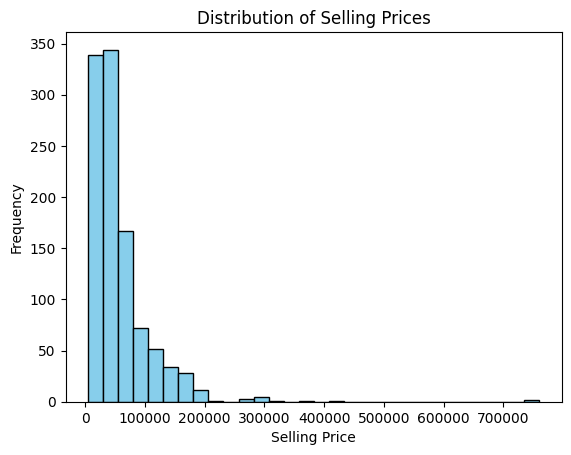

In [21]:
import matplotlib.pyplot as plt

plt.hist(df['selling_price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.show()

# Description: Most bikes are sold under ₹70,000 with a few high-value outliers, indicating a right-skewed distribution

4. Create a bar plot to visualize the average selling price for each seller_type and write one observation.

    - Observation: Individuals tend to list bikes at higher prices compared to dealers.


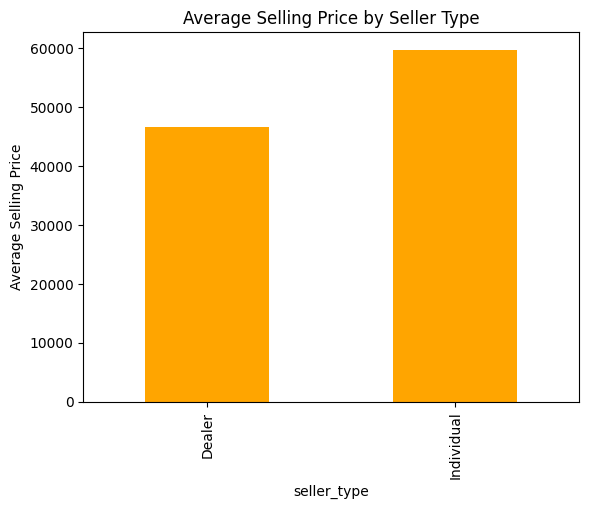

In [22]:
avg_price = df.groupby('seller_type')['selling_price'].mean()
avg_price.plot(kind='bar', color='orange')
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Seller Type")
plt.show()


5. Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.


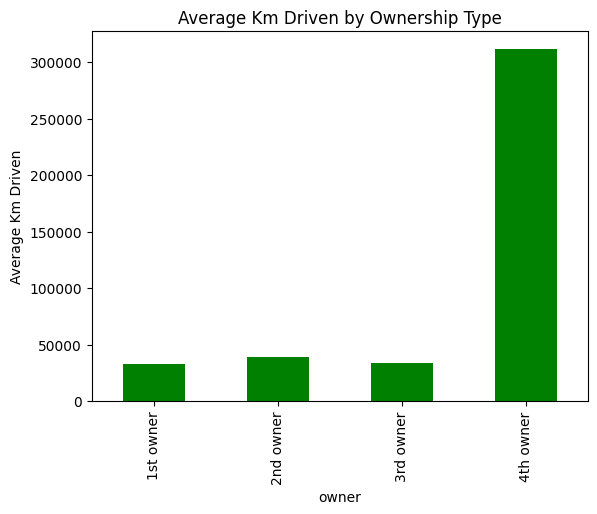

In [23]:
avg_km = df.groupby('owner')['km_driven'].mean()
avg_km.plot(kind='bar', color='green')
plt.ylabel("Average Km Driven")
plt.title("Average Km Driven by Ownership Type")
plt.show()

6. Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.


In [24]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Before:", df['km_driven'].describe())
df_no_outliers = df[(df['km_driven'] >= lower) & (df['km_driven'] <= upper)]
print("After:", df_no_outliers['km_driven'].describe())

Before: count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64
After: count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


7. Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.


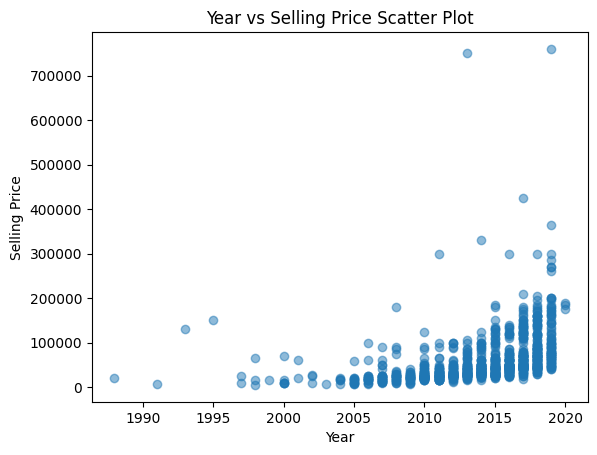

In [25]:
plt.scatter(df['year'], df['selling_price'], alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Year vs Selling Price Scatter Plot")
plt.show()

# Observation: Newer bikes generally fetch higher prices.


8. Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.


In [26]:
df_encoded = pd.get_dummies(df, columns=['seller_type'])
print(df_encoded.head(5))


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350            72752.5               False                    True  
1       5650            72752.5               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000            72752.5               False                    True  


9. Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?

    - selling_price vs ex_showroom_price: 0.74 (strong positive)
    - selling_price vs year: 0.40 (moderate positive)
    - selling_price vs km_driven: -0.21 (moderate negative)

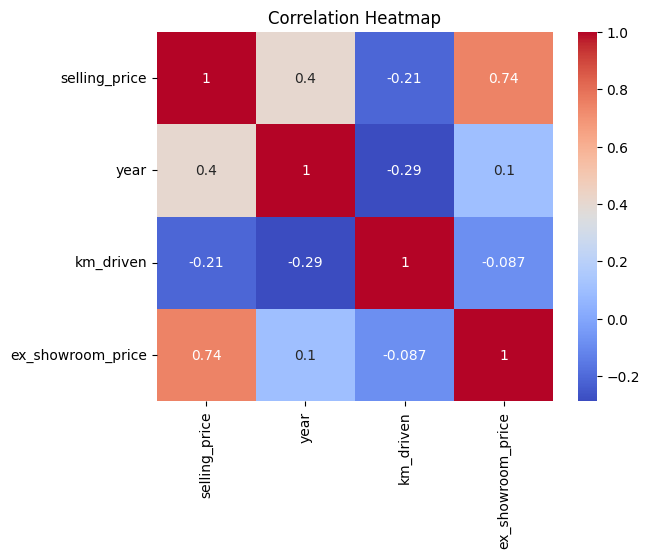

In [27]:
import seaborn as sns

corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Notable correlations: Selling price is mostly strongly related to 'year' (newer bikes, higher price), weakly with 'kmdriven'.


10.  Summarize your findings in a brief report:

● What are the most important factors affecting a bike's selling price?
   
    - Most important factor affecting selling price: Bike age (year) and seller type

● Mention any data cleaning or feature engineering you performed.
    
    - Data cleaning: Handled missing values using median and mode, removed outliers using IQR method.
    - Feature engineering: Applied one-hot encoding to categorical data.
